<a href="https://colab.research.google.com/github/radhikark0707/my-data-analysis/blob/main/winequality_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data=pd.read_csv('/content/winequality-red.csv')


In [87]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

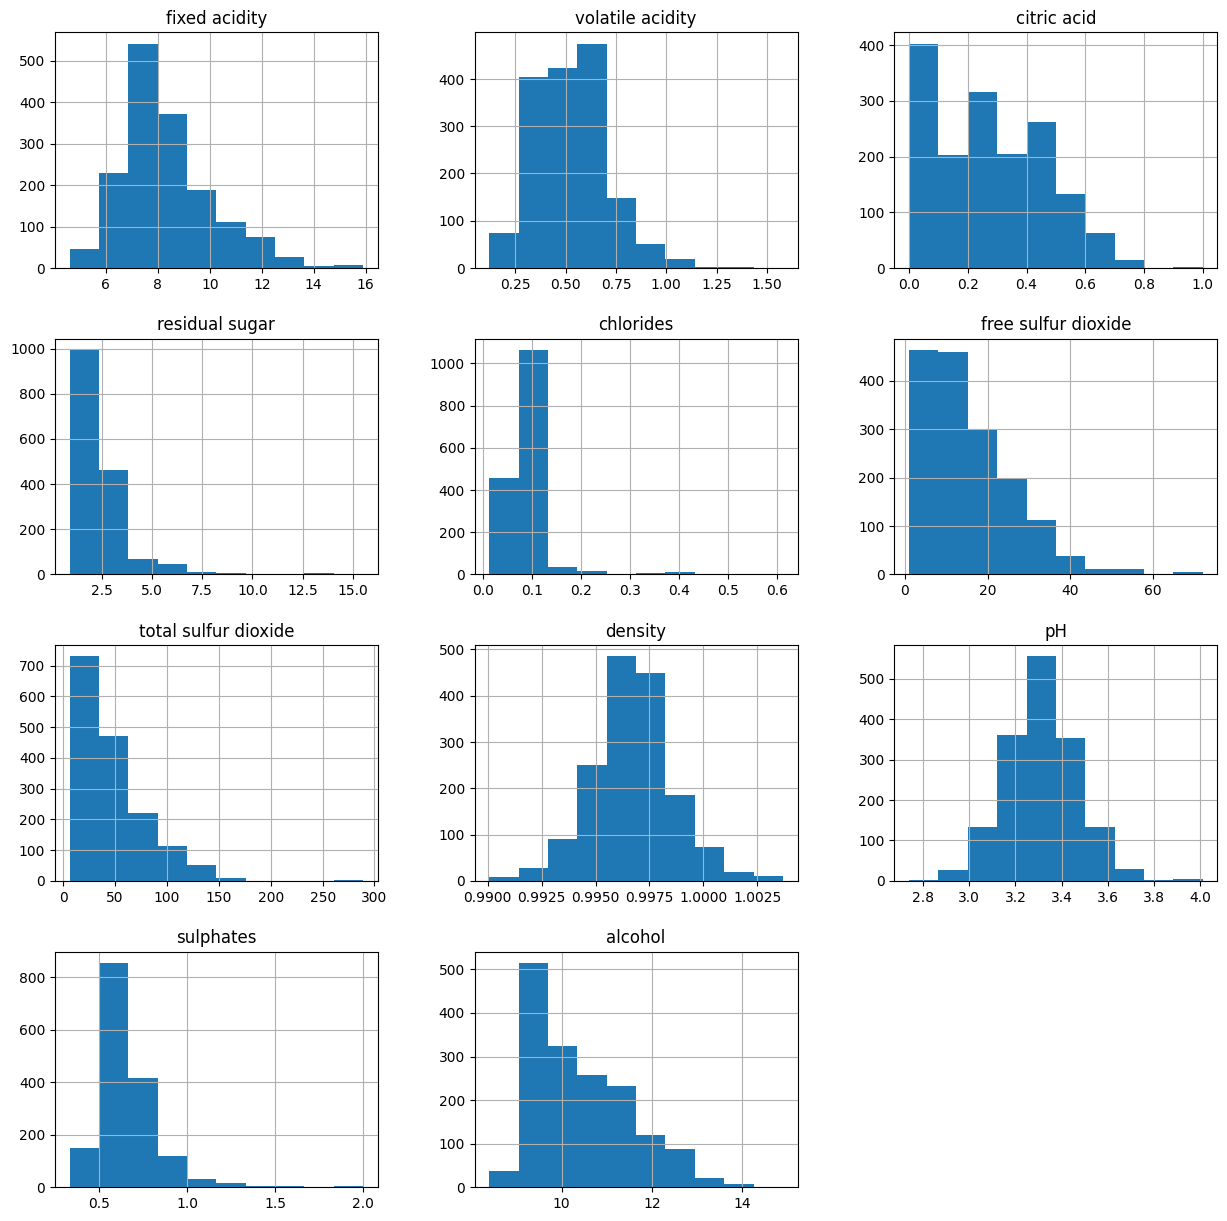

In [91]:
graph=data.select_dtypes(include=['float'])
graph.hist(figsize=(15,15))
plt.show()

In [92]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

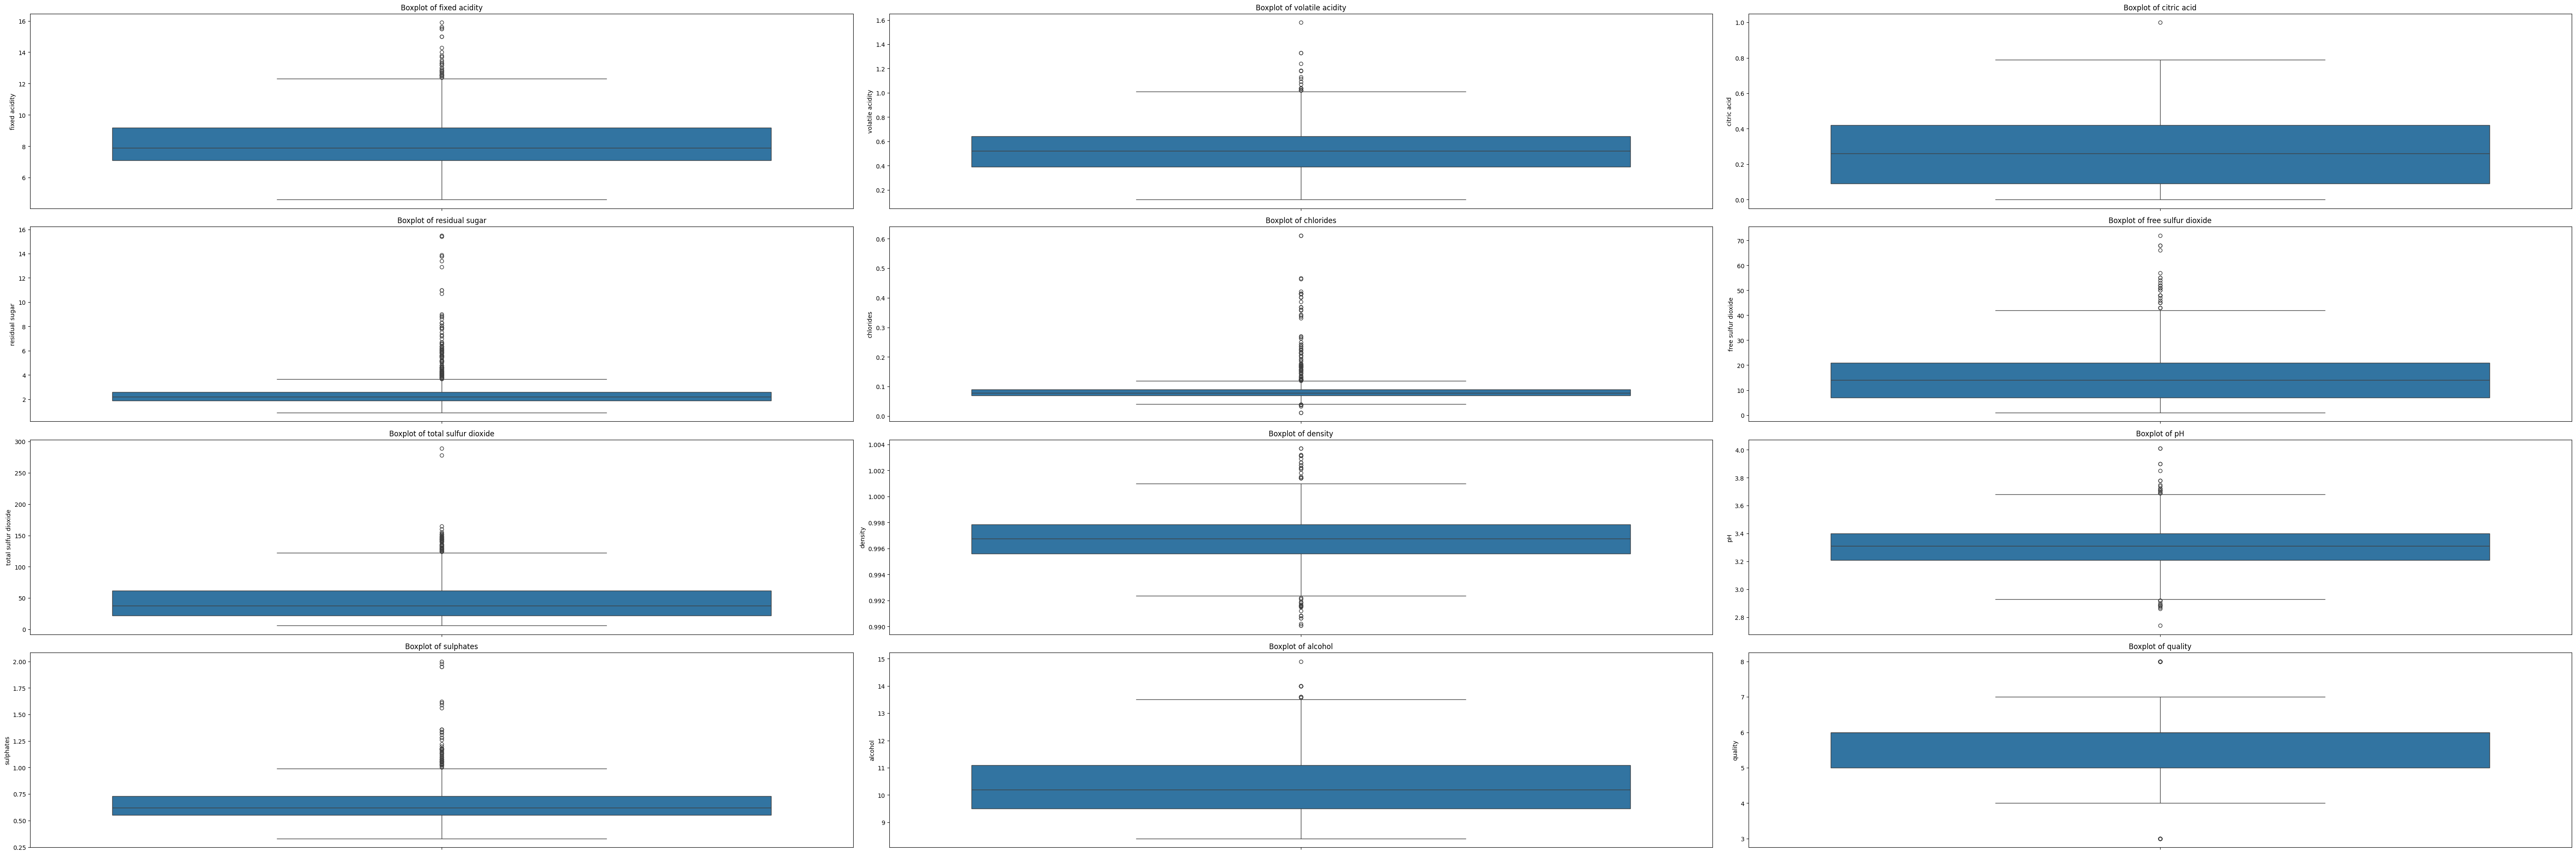

In [93]:
import math
numeric_column=data.select_dtypes(include=['int64','float64']).columns
num_cols=len(numeric_column)
num_c=3
num_rows=math.ceil(num_cols/num_c)
plt.figure(figsize=(5*num_cols,5*num_rows))
for i,col in enumerate(numeric_column):
  plt.subplot(num_rows,num_c,i+1)
  sns.boxplot(y=data[col])
  plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [100]:
from scipy.stats import zscore
numeric_df=data.select_dtypes(include=[np.number])
z_scores=np.abs(zscore(numeric_df))
threshold=3
outliers=(z_scores>threshold)
outlier_row=data[outliers.any(axis=1)]
print("Outliers rows:")
print(outlier_row)
for i in numeric_df.columns:
  mean=data[i].mean()
  std=data[i].std()
  upper_bound=mean+threshold*std
  lower_bound=mean-threshold*std
  data[i]=np.where((data[i]>upper_bound),upper_bound,data[i])
  data[i]=np.where((data[i]<lower_bound),lower_bound,data[i])


Outliers rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
17              8.1             0.560         0.28             1.7      0.368   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1505            6.7             0.760         0.02             1.8      0.078   
1558            6.9             0.630         0.33             6.7      0.235   
1570            6.4             0.360         0.53             2.2      0.230   
1574            5.6             0.310         0.78            13.9      0.074   
1589            6.6             0.725         0.20             7.8      0.073   

      free s

In [102]:
data.to_csv('winequality-red.csv', index=False)
print("Data after caping outlier")
print(data.describe())




Data after caping outlier
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.310203          0.526820     0.270885        2.477991   
std         1.707609          0.175188     0.194496        1.061786   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        13.542926          1.065000     0.855379        6.768590   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.084836            15.774621             46.240967     0.996745   
std       0.030448            10.084268             31.822634     0.001865   
min       0.012000    

In [105]:
x=data.drop('quality',axis=1)
y=data['quality']


In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [110]:
y_pred

array([5.35060077, 5.03282675, 5.74923006, 5.43763592, 5.70313021,
       5.23798299, 5.0252405 , 5.10074927, 5.74971251, 5.68829755,
       6.11073513, 5.24653592, 5.55536444, 5.2479415 , 5.41795664,
       6.43907014, 5.13684933, 5.5862439 , 6.58218384, 5.37656985,
       5.36244316, 5.18898017, 5.93354434, 6.35683765, 5.36806824,
       5.43331804, 6.3903745 , 5.34147781, 5.20956928, 6.22830497,
       5.23193991, 5.43654167, 5.73819565, 5.36758497, 5.47875067,
       5.00285632, 6.16935326, 5.72018062, 5.65243861, 6.1185075 ,
       5.51665208, 5.2358287 , 6.18408613, 5.18646446, 5.91409254,
       5.8975446 , 6.48523696, 5.60824126, 5.13473398, 5.56576277,
       5.2514158 , 5.48134977, 5.5935936 , 6.40739609, 4.92847875,
       4.96770261, 6.03993387, 5.40237196, 5.82038359, 5.23781344,
       5.60077443, 5.97143571, 5.22746506, 5.26849574, 6.52175945,
       5.36789691, 6.31759404, 5.28291157, 6.42099116, 5.30396697,
       6.39723346, 4.75695338, 5.79355236, 5.80605229, 6.17015

In [111]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.38390219391371116


In [112]:
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.40944371748196084
